![copyright](logo.png "Copyright (c) 2017, Bas Hoonhout")

<div style="text-align: right"> Aeolis workshop material Copyright (c) 2017, Bas Hoonhout </div>
<div style="text-align: right"> 2023, Aeolis developer team </div>



# Purpose

This notebook reproduces figure ?? in de Vries et al 2023.

# Run AeoLiS to generate data

- Leave this notebook and switch to your terminal.
- Navigate to the model schematizations.
- Run the following command:

  ``aeolis Run1.txt``


If it is done you can continue reading the model output!

notes during my models setup:
- let's start with a 100m wide beach with a 20m intertidal zone which is consistent with de Vries et. al. 2014.
- let's add an alonshore dimension of 1000m.


In [1]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib notebook

In [14]:
# generate grids
[y_grid,x_grid] = np.mgrid[0:10,0:100]
# save grid to files
np.savetxt('x_grid.txt',x_grid,fmt='%.d')
np.savetxt('y_grid.txt',y_grid,fmt='%.d')
np.savetxt('z_grid.txt',np.zeros(np.shape(x_grid)),fmt='%.d')


supply = np.zeros(np.shape(x_grid)) 
#supply[:,0:20] = 0.00006
supply[:,0:21] = 0.0005

np.savetxt('supply_file.txt',supply,fmt='%.5f')


#generate windfile
angle = 45.
speed = 10.
np.savetxt('wind.txt',[[0, 8, angle],
                       [40, 8, angle],
                       [41, 6, angle],
                       [55, 6, angle],
                       [56, 9, angle],
                       [300, 9, angle]],
                       fmt=('%.d %.d %.d'))

# np.savetxt('wind.txt',[[0, speed, angle],[10, speed, angle]], fmt=('%.d %.d %.d'))





(176, 10, 100, 1)


<IPython.core.display.Javascript object>


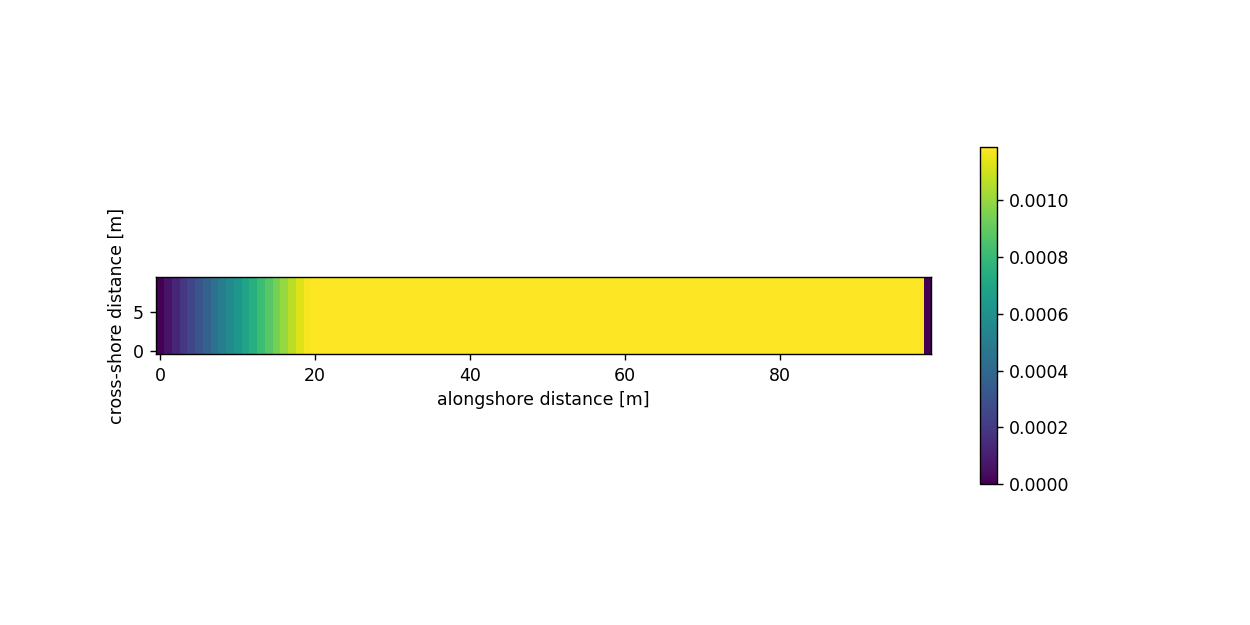

In [4]:
ncfile = 'Run2.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    
    # get spatial dimensions and bed levels
    x = ds.variables['x'][:,:]
    y = ds.variables['y'][:,:]
    Ct = ds.variables['Ct'][...]
    #pickup = ds.variables['pickup_sum'][...]
    print(Ct.shape)
    
    # create figure
    fig, ax = plt.subplots(figsize=(10,5))
    
    # plot bed levels and bed level change
    p = ax.pcolormesh(x, y, Ct_60[35,:,:,0])
    cb = fig.colorbar(p, shrink=.7)
    
    #ax.contour(y, x, zb[0,:,:], [0.], colors=['k'])
        
    ax.set_aspect('equal', adjustable='box')
            
    ax.set_xlabel('alongshore distance [m]')
    ax.set_ylabel('cross-shore distance [m]')




<IPython.core.display.Javascript object>


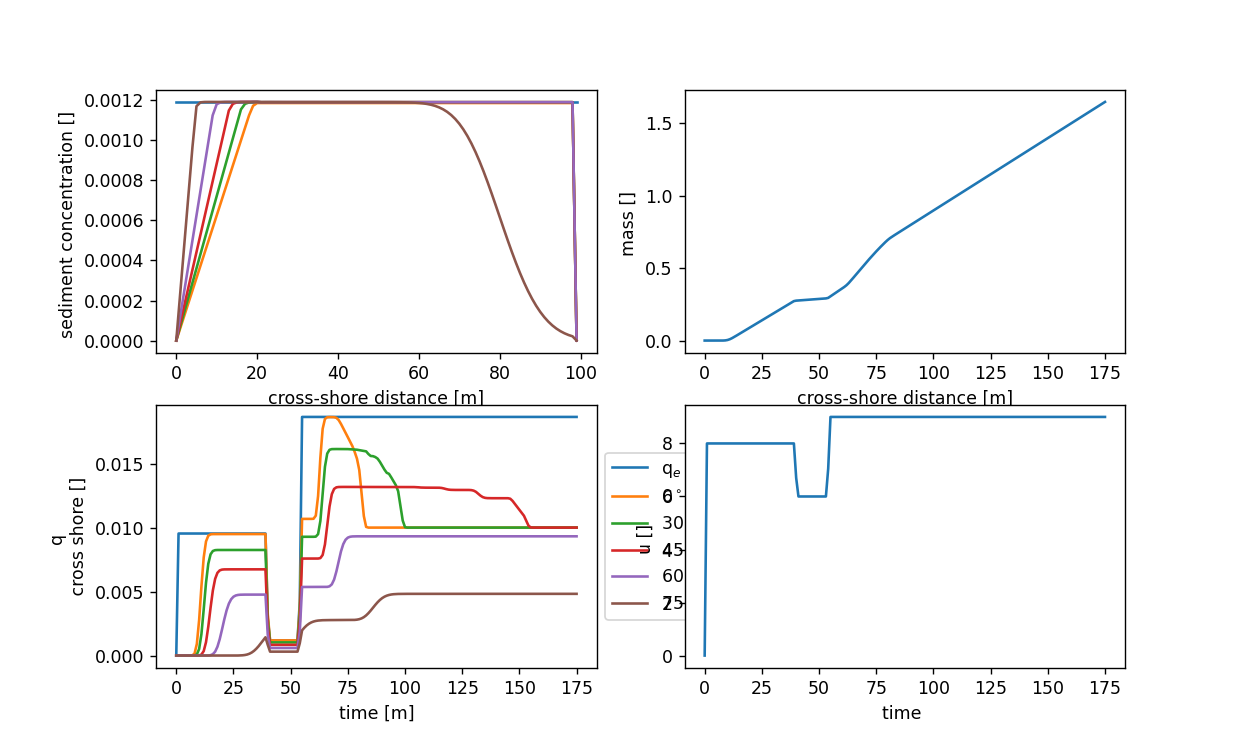

0.009493067860603333
0.009536895900964737


Text(0.5, 0, 'time ')

In [6]:
ncfile = 'Run2.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    
    # get spatial dimensions and bed levels
    t = ds.variables['time'][:]
    x = ds.variables['x'][:,:]
    y = ds.variables['y'][:,:]
    Ct = ds.variables['Ct'][...]
    Cu = ds.variables['Cu'][...]
    mass = ds.variables['mass'][...]
    pickup = ds.variables['pickup'][...]
    uth = ds.variables['uth'][...]
    uw= ds.variables['uw'][...]
    qs= ds.variables['qs'][...]
    qn= ds.variables['qn'][...]
    q= ds.variables['q'][...]

    
ncfile = 'Run2c.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    # get spatial dimensions and bed levels
    Ct_30 = ds.variables['Ct'][...]
    mass_30 = ds.variables['mass'][...]
    pickup_30 = ds.variables['pickup'][...]
    qs_30= ds.variables['qs'][...]
    q_30n= ds.variables['qn'][...]
    q_30= ds.variables['q'][...]  
    
ncfile = 'Run2b.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    # get spatial dimensions and bed levels
    Ct_45 = ds.variables['Ct'][...]
    mass_45 = ds.variables['mass'][...]
    pickup_45 = ds.variables['pickup'][...]
    qs_45= ds.variables['qs'][...]
    q_45n= ds.variables['qn'][...]
    q_45= ds.variables['q'][...]

ncfile = 'Run2d.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    # get spatial dimensions and bed levels
    Ct_60 = ds.variables['Ct'][...]
    mass_60 = ds.variables['mass'][...]
    pickup_60 = ds.variables['pickup'][...]
    qs_60= ds.variables['qs'][...]
    q_60n= ds.variables['qn'][...]
    q_60= ds.variables['q'][...]

ncfile = 'Run2e.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    # get spatial dimensions and bed levels
    Ct_75 = ds.variables['Ct'][...]
    mass_75 = ds.variables['mass'][...]
    pickup_75 = ds.variables['pickup'][...]
    qs_75= ds.variables['qs'][...]
    q_75n= ds.variables['qn'][...]
    q_75= ds.variables['q'][...]


    
# create figure
fig, ax = plt.subplots(2,2,figsize=(10,6))

ax[0,0].plot(np.transpose(Cu[30,5,:,0]))
ax[0,0].plot(np.transpose(Ct[30,5,:,0]))
ax[0,0].plot(np.transpose(Ct_30[30,5,:,0]))
ax[0,0].plot(np.transpose(Ct_45[30,5,:,0]))
ax[0,0].plot(np.transpose(Ct_60[30,5,:,0]))
ax[0,0].plot(np.transpose(Ct_75[30,5,:,0]))
ax[0,0].set_ylabel('sediment concentration [] ')
ax[0,0].set_xlabel('cross-shore distance [m]')



#ax[0,1].plot(np.transpose(mass[:,5,:,0,0]))#-supply[5,:]))
ax[0,1].plot(qs[:,5,-2,0].cumsum())#-supply[5,:]))
ax[0,1].set_ylabel('mass [] ')
ax[0,1].set_xlabel('cross-shore distance [m]')


#ax[1,0].plot(q[:,5,-2,0])
ax[1,0].plot(Cu[:,5,-2,0]*uw[:,5,-2], label='q$_e$')
ax[1,0].plot(qs[:,5,-2,0],label='$0^\circ$')
ax[1,0].plot(qs_30[:,5,-2,0],label='$30^\circ$')
ax[1,0].plot(qs_45[:,5,-2,0],label='$45^\circ$')
ax[1,0].plot(qs_60[:,5,-2,0],label='$60^\circ$')
ax[1,0].plot(qs_75[:,5,-2,0],label='$75^\circ$')
ax[1,0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

print(q[20,5,-2,0])
print(Cu[20,5,-2,0]*uw[20,5,-2])

ax[1,0].set_ylabel('q \n cross shore [] ')
ax[1,0].set_xlabel('time [m]')    

ax[1,1].plot(uw[:,5,-2])
#ax[1,1].plot(mass[:,5,19,0,0])
ax[1,1].set_ylabel('u [] ')
ax[1,1].set_xlabel('time ')

<IPython.core.display.Javascript object>


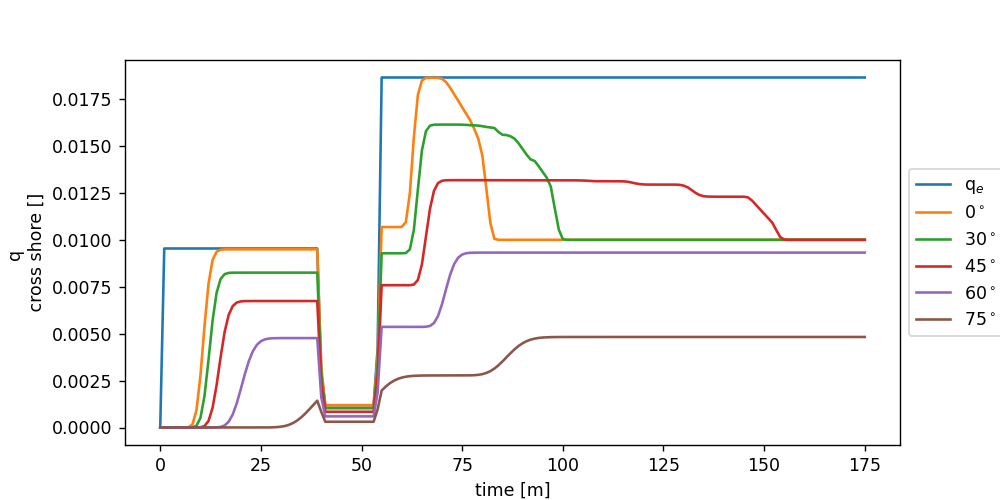

Text(0.5, 0, 'time [m]')

In [23]:
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(Cu[:,5,-2,0]*uw[:,5,-2], label='q$_e$')
ax.plot(qs[:,5,-2,0],label='$0^\circ$')
ax.plot(qs_30[:,5,-2,0],label='$30^\circ$')
ax.plot(qs_45[:,5,-2,0],label='$45^\circ$')
ax.plot(qs_60[:,5,-2,0],label='$60^\circ$')
ax.plot(qs_75[:,5,-2,0],label='$75^\circ$')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_ylabel('q \n cross shore [] ')
ax.set_xlabel('time [m]')    


<IPython.core.display.Javascript object>


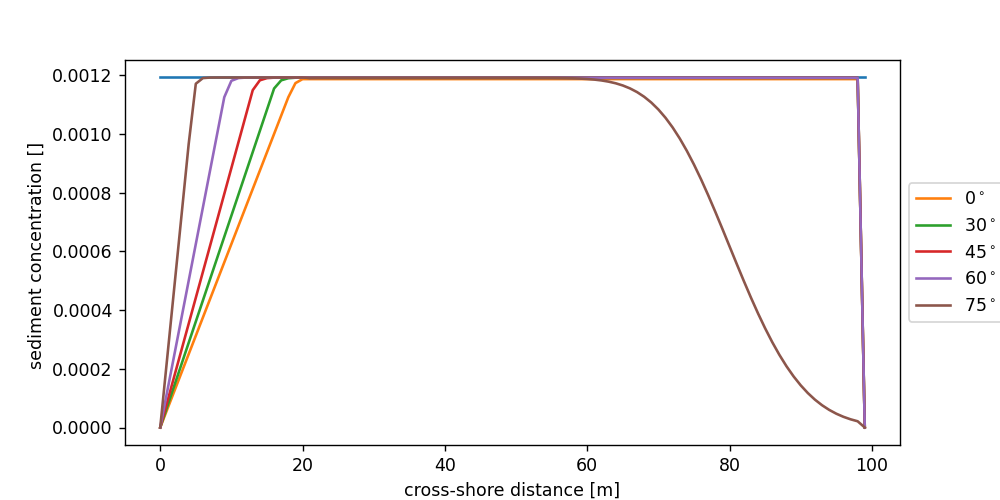

Text(0.5, 0, 'cross-shore distance [m]')

In [29]:
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(np.transpose(Cu[30,5,:,0]))
ax.plot(np.transpose(Ct[30,5,:,0]),label='$0^\circ$')
ax.plot(np.transpose(Ct_30[30,5,:,0]),label='$30^\circ$')
ax.plot(np.transpose(Ct_45[30,5,:,0]),label='$45^\circ$')
ax.plot(np.transpose(Ct_60[30,5,:,0]),label='$60^\circ$')
ax.plot(np.transpose(Ct_75[30,5,:,0]),label='$75^\circ$')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel('sediment concentration [] ')
ax.set_xlabel('cross-shore distance [m]')


<IPython.core.display.Javascript object>


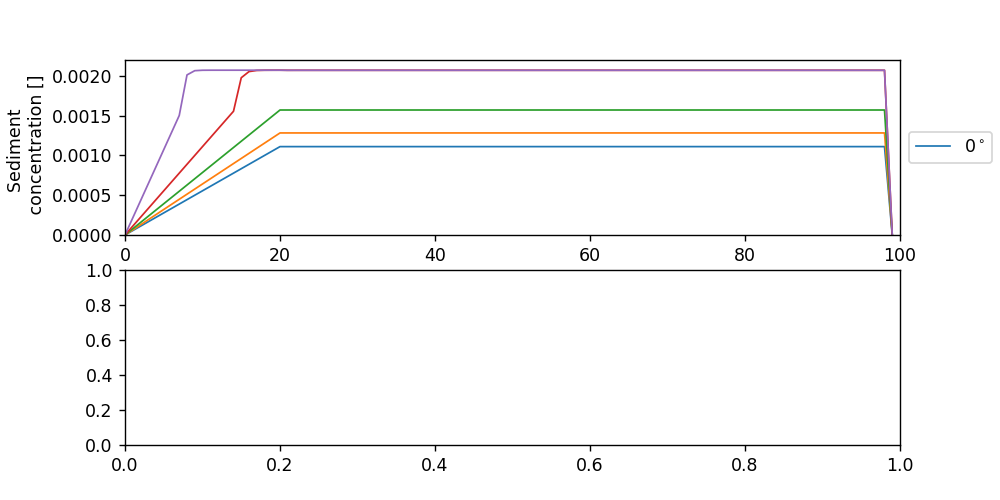

In [54]:
#plots 
fig, ax = plt.subplots(2,figsize=(8, 4))

#ax = fig.add_subplot(gs[1:3, 0])
ax[0].set_xlim(( 0, 100))            
ax[0].set_ylim((0, 0.0022))
ax[0].set_ylabel('Sediment \n concentration []')
ax[0].set_xlabel('Cross-shore distance []')

#ax0.set_xlabel(None)
line1, = ax[0].plot([], [],  lw=1,label='$0^\circ$') 
line2, = ax[0].plot([], [],  lw=1) 
line3, = ax[0].plot([], [],  lw=1) 
line4, = ax[0].plot([], [],  lw=1) 
line5, = ax[0].plot([], [],  lw=1) 
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))



def drawframe(n,*fargs):
    #print(n)
    #print(Ct[n,5,:,0].shape)
    line1.set_data(x[5,:],Ct[n,5,:,0])
    line2.set_data(x[5,:],Ct_30[n,5,:,0])
    line3.set_data(x[5,:],Ct_45[n,5,:,0])    
    line4.set_data(x[5,:],Ct_60[n,5,:,0])
    line5.set_data(x[5,:],Ct_75[n,5,:,0])
    
    
    
    return line1,line2,line3

fig.set_size_inches(10, 5)
anim = animation.FuncAnimation(fig, drawframe, fargs=("Ct","Ct_30","Ct_45","Ct_60","Ct_75","mass","t","x"), frames=t.size-1, interval=200, blit=True, repeat=False )





<IPython.core.display.Javascript object>


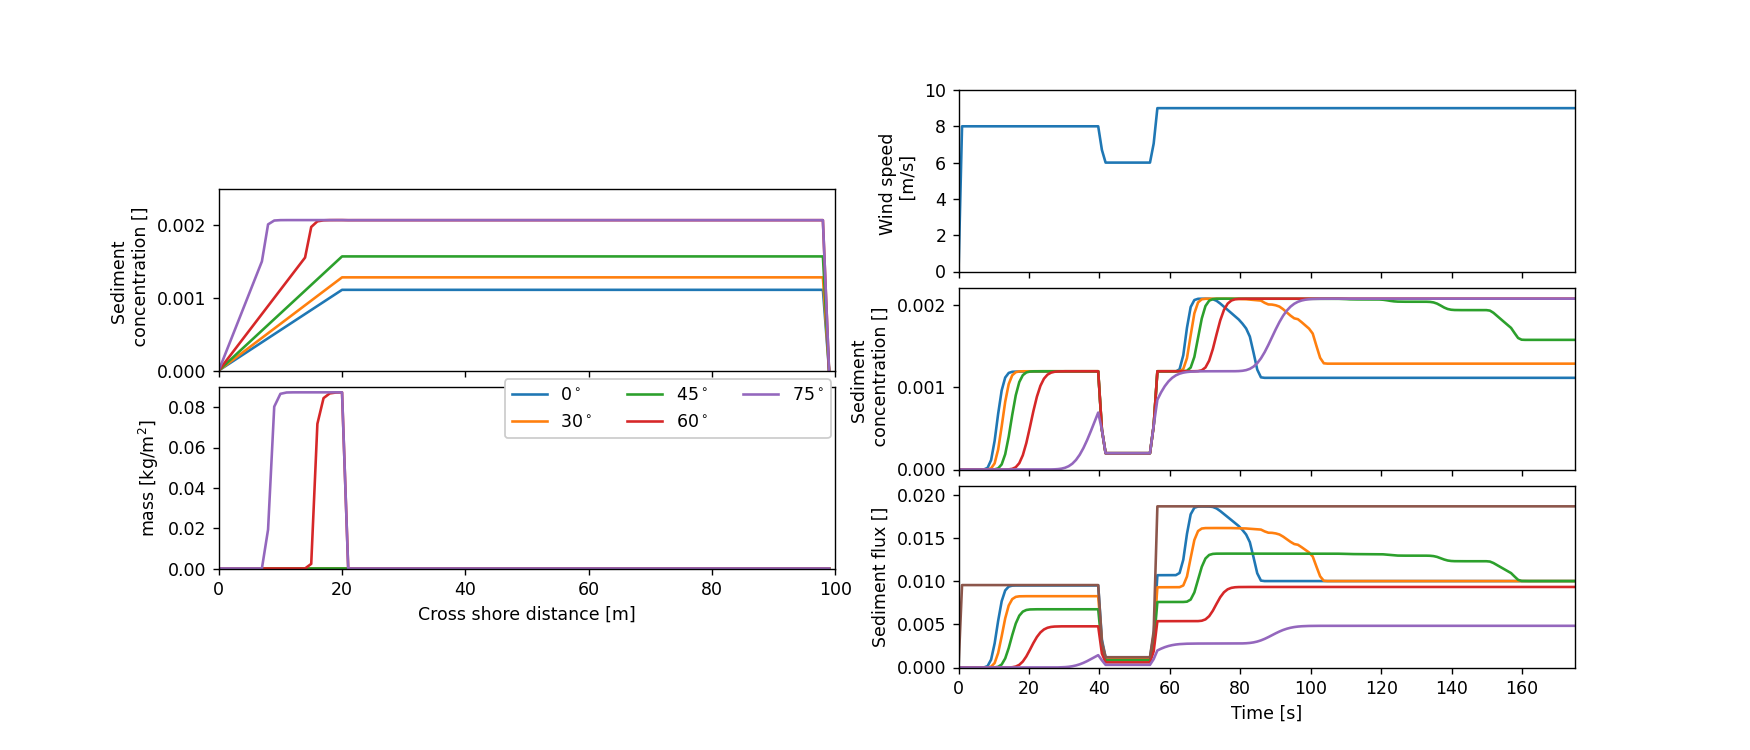

In [4]:

#plots 
fig = plt.figure(figsize=(14, 6))
gs = plt.GridSpec(nrows=6, ncols=2)

ax0 = fig.add_subplot(gs[1:3, 0])
ax0.set_xlim(( 0, 100))            
ax0.set_ylim((0, 0.0025))
ax0.set_ylabel('Sediment \n concentration []')
#ax0.set_xlabel(None)
line1, = ax0.plot([], [],  lw=1.5,label='$0^\circ$') 
line2, = ax0.plot([], [],  lw=1.5,label='$30^\circ$') 
line3, = ax0.plot([], [],  lw=1.5,label='$45^\circ$') 
line4, = ax0.plot([], [],  lw=1.5,label='$60^\circ$') 
line5, = ax0.plot([], [],  lw=1.5,label='$75^\circ$') 
#ax0.legend(loc='center left', ncol=5, bbox_to_anchor=(0.05, -0.05), framealpha=1)

ax0.set_yticks([0,0.001,0.002])
ax0.set_xticklabels([])

ax1 = fig.add_subplot(gs[3:5, 0])
ax1.set_xlim(( 0, 100))            
ax1.set_ylim((0, 0.09))
ax1.set_ylabel('mass [kg/m$^2$]')
ax1.set_xlabel('Cross shore distance [m]')
line6, = ax1.plot([], [], lw=1.5,label='$0^\circ$') 
line7, = ax1.plot([], [], lw=1.5,label='$30^\circ$') 
line8, = ax1.plot([], [], lw=1.5,label='$45^\circ$') 
line9, = ax1.plot([], [], lw=1.5,label='$60^\circ$') 
line10, = ax1.plot([], [], lw=1.5,label='$75^\circ$') 
ax1.legend(loc='center left', ncol=3, bbox_to_anchor=(0.45, 0.88), framealpha=1)
ax1.legend(['$0^\circ$','$0^\circ$','$0^\circ$','$0^\circ$'],loc='center left', ncol=3, bbox_to_anchor=(0.45, 0.88), framealpha=1)


ax2 = fig.add_subplot(gs[0:2, 1])
ax2.plot(t,uw[:,5,0])
ax2.set_ylabel('Wind speed \n [m/s]')
ax2.set_xticklabels([])
ax2.set_ylim([0, 10])
ax2.set_xlim([0, 175])

line11, = ax2.plot([], [], 'r', lw=1) 

ax3 = fig.add_subplot(gs[2:4, 1])
ax3.plot(t,Ct[:,5,-2,0])
ax3.plot(t,Ct_30[:,5,-2,0])
ax3.plot(t,Ct_45[:,5,-2,0])
ax3.plot(t,Ct_60[:,5,-2,0])
ax3.plot(t,Ct_75[:,5,-2,0])

ax3.set_ylabel('Sediment \n concentration []')
ax3.set_xticklabels([])
#ax3.yticks([0.001])
ax3.set_yticks([0,0.001,0.002])
ax3.set_ylim([0, 0.0022])
ax3.set_xlim([0, 175])

line12, = ax3.plot([], [], 'r', lw=1) 

ax4 = fig.add_subplot(gs[4:6, 1])
ax4.plot(t,qs[:,5,-2,0])
ax4.plot(t,qs_30[:,5,-2,0])
ax4.plot(t,qs_45[:,5,-2,0])
ax4.plot(t,qs_60[:,5,-2,0])
ax4.plot(t,qs_75[:,5,-2,0])
ax4.plot(t,Cu[:,5,-2,0]*uw[:,5,-2])
ax4.set_ylabel('Sediment flux []')
ax4.set_xlabel('Time [s]')
ax4.set_ylim([0, 0.021])
ax4.set_xlim([0, 175])
line13, = ax4.plot([], [], 'r', lw=1) 



def drawframe(n,*fargs):
    #print(n)
    #print(Ct[n,5,:,0].shape)
    line1.set_data(x[5,:],Ct[n,5,:,0])
    line2.set_data(x[5,:],Ct_30[n,5,:,0])
    line3.set_data(x[5,:],Ct_45[n,5,:,0])    
    line4.set_data(x[5,:],Ct_60[n,5,:,0])
    line5.set_data(x[5,:],Ct_75[n,5,:,0])

    line6.set_data(x[5,:],mass[n,5,:,0])
    line7.set_data(x[5,:],mass_30[n,5,:,0])
    line8.set_data(x[5,:],mass_45[n,5,:,0])
    line9.set_data(x[5,:],mass_60[n,5,:,0])
    line10.set_data(x[5,:],mass_75[n,5,:,0])
    
    line11.set_data((t[n],t[n]),(0,10))
    line12.set_data((t[n],t[n]),(0,0.003))
    line13.set_data((t[n],t[n]),(0,0.02))
    
    
    return line1,line2,line3,line4,line5,

fig.set_size_inches(10, 5)
anim = animation.FuncAnimation(fig, drawframe, fargs=("Ct","Ct_30","Ct_45","Ct_60","Ct_75",
                                                      "mass","mass_30","mass_45","mass_60","mass_75",
                                                      "qs","qs_30","qs_45","qs_60","qs_75",
                                                      "t","x"), 
                               frames=t.size-1, interval=200, blit=True, repeat=False )



In [95]:
#fig.set_size_inches(14, 6)
anim.save('supply_wind_var.mp4')

In [5]:
from IPython.display import HTML
fig.set_size_inches(14, 6)
HTML(anim.to_html5_video())

<IPython.core.display.Javascript object>


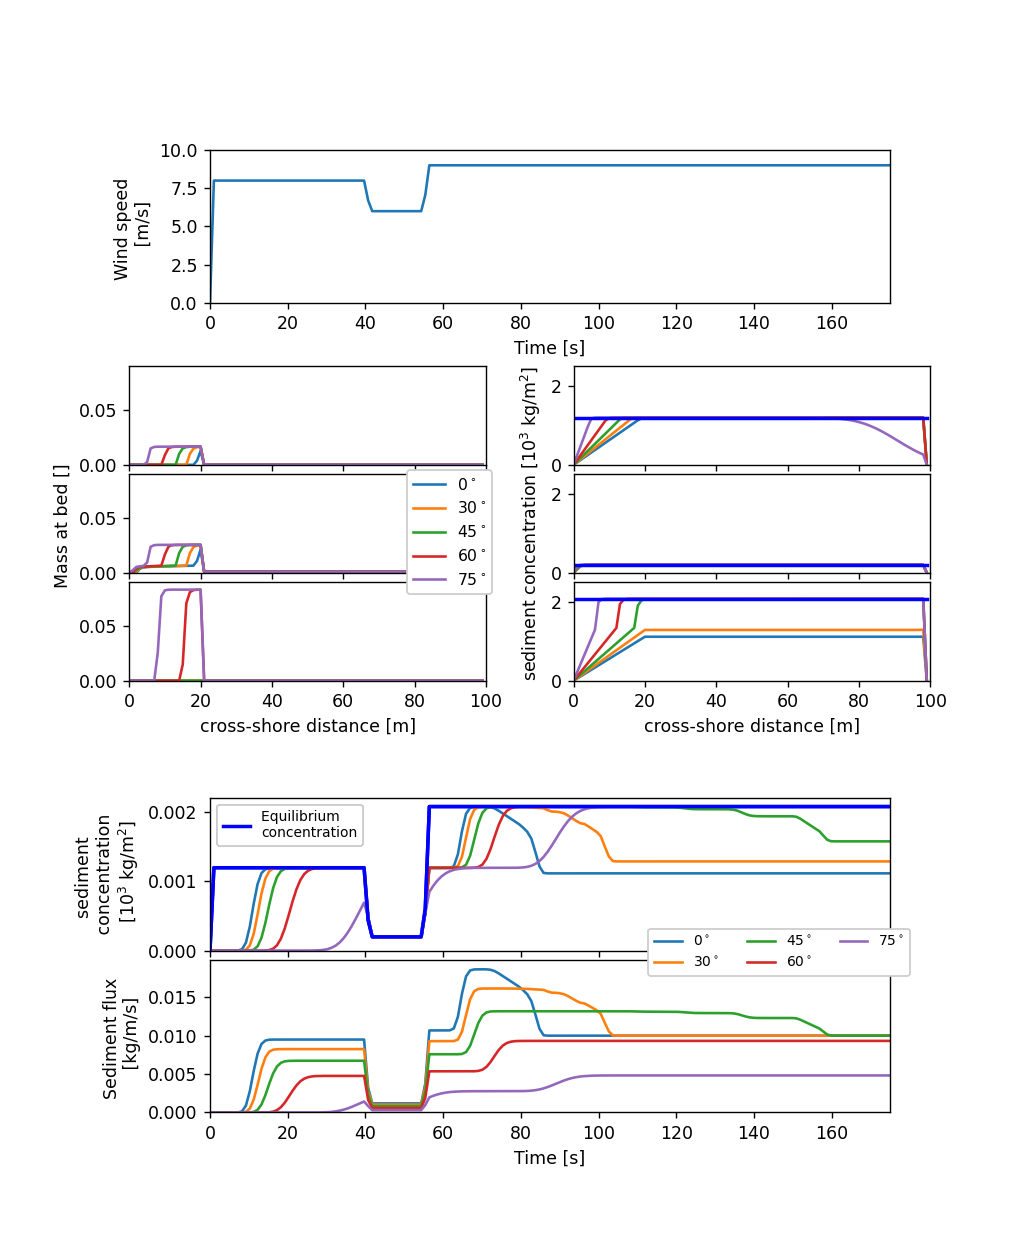

In [68]:
ncfile = 'Run2.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    
    # get spatial dimensions and bed levels
    t = ds.variables['time'][:]
    x = ds.variables['x'][:,:]
    y = ds.variables['y'][:,:]
    Ct = ds.variables['Ct'][...]
    Cu = ds.variables['Cu'][...]
    mass = ds.variables['mass'][...]
    pickup = ds.variables['pickup'][...]
    uth = ds.variables['uth'][...]
    uw= ds.variables['uw'][...]
    q= ds.variables['q'][...]
    u= ds.variables['uw'][...]

    
# create figure
#lets go a4
#fig = plt.figure(figsize=(8.27,11.69))
fig = plt.figure(figsize=(8.27,10))

gs = plt.GridSpec(nrows=18, ncols=20)

ax0 = fig.add_subplot(gs[4:6, 11:20])
ax0.plot(np.transpose(Ct[[35],5,:,0])*1e3)
ax0.plot(np.transpose(Ct_30[[35],5,:,0])*1e3)
ax0.plot(np.transpose(Ct_45[[35],5,:,0])*1e3)
ax0.plot(np.transpose(Ct_60[[35],5,:,0])*1e3)
ax0.plot(np.transpose(Ct_75[[35],5,:,0])*1e3)
ax0.plot(np.transpose(Cu[35,5,:,0])*1e3, 'b', lw = 2)
ax0.set_xlabel('cross-shore distance [m]')
ax0.set_xlim(( 0, 100))    
ax0.set_xticklabels([])
ax0.set_ylim((0, 2.5))

ax1 = fig.add_subplot(gs[6:8, 11:20])

ax1.plot(np.transpose(Ct[[50],5,:,0])*1e3)
ax1.plot(np.transpose(Ct_30[[50],5,:,0])*1e3)
ax1.plot(np.transpose(Ct_45[[50],5,:,0])*1e3)
ax1.plot(np.transpose(Ct_60[[50],5,:,0])*1e3)
ax1.plot(np.transpose(Ct_75[[50],5,:,0])*1e3)
ax1.plot(np.transpose(Cu[50,5,:,0])*1e3, 'b', lw = 2)
ax1.set_ylabel('sediment concentration [10$^3$ kg/m$^2$] ')
ax1.set_xlabel('cross-shore distance [m]')
ax1.set_xlim(( 0, 100))
ax1.set_xticklabels([])
ax1.set_ylim((0, 2.5))

#ax2 = fig.add_subplot(gs[8:10, 0:9])
ax2 = fig.add_subplot(gs[8:10, 11:20])
ax2.plot(np.transpose(Ct[[100],5,:,0])*1e3)
ax2.plot(np.transpose(Ct_30[[100],5,:,0])*1e3)
ax2.plot(np.transpose(Ct_45[[100],5,:,0])*1e3)
ax2.plot(np.transpose(Ct_60[[100],5,:,0])*1e3)
ax2.plot(np.transpose(Ct_75[[100],5,:,0])*1e3)
ax2.plot(np.transpose(Cu[60,5,:,0])*1e3, 'b', lw = 2)
ax2.set_xlabel('cross-shore distance [m]')
ax2.set_xlim(( 0, 100))            
ax2.set_ylim((0, 2.5))

ax3 = fig.add_subplot(gs[4:6, 0:9])
ax3.plot(np.transpose(mass[[35],5,:,0,0]))
ax3.plot(np.transpose(mass_30[[35],5,:,0,0]))
ax3.plot(np.transpose(mass_45[[35],5,:,0,0]))
ax3.plot(np.transpose(mass_60[[35],5,:,0,0]))
ax3.plot(np.transpose(mass_75[[35],5,:,0,0]))
#ax3.set_ylabel('sediment concentration [] ')
ax3.set_xlabel('cross-shore distance [m]')
ax3.set_xlim(( 0, 100))   
ax3.set_xticklabels([])
ax3.set_ylim((0, 0.09))
#ax3.legend(['$0^\circ$','$0^\circ$','$0^\circ$','$0^\circ$'],loc='center left', ncol=3, bbox_to_anchor=(0.45, 0.88), framealpha=1)


ax4 = fig.add_subplot(gs[6:8, 0:9])
ax4.plot(np.transpose(mass[50,5,:,0,0]))
ax4.plot(np.transpose(mass_30[[50],5,:,0,0]))
ax4.plot(np.transpose(mass_45[[50],5,:,0,0]))
ax4.plot(np.transpose(mass_60[[50],5,:,0,0]))
ax4.plot(np.transpose(mass_75[[50],5,:,0,0]))
ax4.set_ylabel('Mass at bed [] ')
ax4.set_xlabel('cross-shore distance [m]')
ax4.set_xlim(( 0, 100))  
ax4.set_xticklabels([])
ax4.set_ylim((0, 0.09))
#ax4.legend(['$0^\circ$','$30^\circ$','$45^\circ$','$60^\circ$','$75^\circ$'],
#          loc='center right', ncol=1, framealpha=1, prop={'size': 9}, bbox_to_anchor=(1.04, 0.5))
#ax4.legend(['t=50'],
#          loc='center right', ncol=2, framealpha=1, prop={'size': 8}, bbox_to_anchor=(1.04, 0.5))

ax5 = fig.add_subplot(gs[8:10, 0:9])
ax5.plot(np.transpose(mass[165,5,:,0,0]))
ax5.plot(np.transpose(mass_30[[165],5,:,0,0]))
ax5.plot(np.transpose(mass_45[[165],5,:,0,0]))
ax5.plot(np.transpose(mass_60[[165],5,:,0,0]))
ax5.plot(np.transpose(mass_75[[165],5,:,0,0]))
#ax5.set_ylabel('sediment concentration [] ')
ax5.set_xlabel('cross-shore distance [m]')
ax5.set_xlim(( 0, 100))            
ax5.set_ylim((0, 0.09))
ax5.legend(['$0^\circ$','$30^\circ$','$45^\circ$','$60^\circ$','$75^\circ$'],
          loc='center right', ncol=1, framealpha=1, prop={'size': 9}, bbox_to_anchor=(1.04, 1.5))
#ax5.legend(['t=55','t=60','t=61','t=62','t=63','t=70','t=100'],
#          loc='center right', ncol=2, framealpha=1, prop={'size': 8}, bbox_to_anchor=(1.04, 0.5))

#lets place this one at the top.
ax6t = fig.add_subplot(gs[0:3, 2:19])
ax6t.plot(t,u[:,5,0])
ax6t.set_ylabel('Wind speed \n [m/s]')
ax6t.set_xlabel('Time [s]')
ax6t.set_ylim([0, 10])
ax6t.set_xlim([0, 175])

ax7 = fig.add_subplot(gs[12:15, 2:19])
ax7.plot(t,Cu[:,5,-2,0], 'b', lw = 2)
ax7.plot(t,Ct[:,5,-2,0])
ax7.plot(t,Ct_30[:,5,-2,0])
ax7.plot(t,Ct_45[:,5,-2,0])
ax7.plot(t,Ct_60[:,5,-2,0])
ax7.plot(t,Ct_75[:,5,-2,0])
ax7.plot(t,Cu[:,5,-2,0], 'b', lw = 2)
ax7.set_ylabel('sediment \n concentration \n [10$^3$ kg/m$^2$]')
ax7.set_xticklabels([])
#ax3.yticks([0.001])
ax7.set_yticks([0,0.001,0.002])
ax7.set_ylim([0, 0.0022])
ax7.set_xlim([0, 175])
ax7.add_artist(plt.legend(['Equilibrium \nconcentration'],loc='upper left', ncol=1, framealpha=1, prop={'size': 8}))
#ax7.add_artist(plt.legend(['_nolegend','$0^\circ$','$30^\circ$','$45^\circ$','$60^\circ$','$75^\circ$'],
#          loc='lower right', ncol=3, framealpha=1, prop={'size': 8}))

ax8 = fig.add_subplot(gs[15:18, 2:19])
ax8.plot(t,qs[:,5,-2,0])
ax8.plot(t,qs_30[:,5,-2,0])
ax8.plot(t,qs_45[:,5,-2,0])
ax8.plot(t,qs_60[:,5,-2,0])
ax8.plot(t,qs_75[:,5,-2,0])

#ax8.plot(t,Cu[:,5,-2,0]*u[:,5,-2])
ax8.set_ylabel('Sediment flux \n [kg/m/s]')
ax8.set_xlabel('Time [s]')
ax8.set_ylim([0, 0.0199])
ax8.set_xlim([0, 175])
ax8.legend(['$0^\circ$','$30^\circ$','$45^\circ$','$60^\circ$','$75^\circ$'],
          loc='lower right', ncol=3, framealpha=1, prop={'size': 8}, bbox_to_anchor=(1.04, 0.85))



In [69]:
fig.savefig('Run2.png')

In [70]:
print(t)

[  0.     1.     2.     3.05   4.1    5.15   6.2    7.25   8.25   9.25
  10.25  11.25  12.25  13.25  14.25  15.25  16.25  17.25  18.25  19.25
  20.25  21.25  22.25  23.25  24.25  25.25  26.25  27.25  28.25  29.25
  30.25  31.25  32.3   33.35  34.4   35.45  36.5   37.55  38.6   39.65
  40.7   41.75  42.8   43.85  44.9   45.95  47.    48.05  49.1   50.15
  51.2   52.25  53.3   54.35  55.4   56.45  57.5   58.55  59.6   60.65
  61.7   62.75  63.8   64.85  65.9   66.95  68.    69.05  70.1   71.15
  72.2   73.25  74.3   75.35  76.4   77.45  78.5   79.55  80.6   81.65
  82.7   83.75  84.8   85.85  86.9   87.95  89.    90.05  91.1   92.15
  93.2   94.25  95.3   96.35  97.4   98.45  99.5  100.55 101.6  102.65
 103.7  104.75 105.8  106.85 107.9  108.95 110.   111.05 112.1  113.15
 114.2  115.25 116.3  117.35 118.4  119.45 120.5  121.55 122.6  123.65
 124.7  125.75 126.8  127.85 128.85 129.85 130.85 131.85 132.85 133.85
 134.85 135.85 136.85 137.85 138.85 139.85 140.85 141.85 142.85 143.85
 144.8